
**Import necessary libraries**


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Import your Dataset**

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Summarize the dataset**

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**display columns**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**display number of rows and columns**

In [ ]:
df.shape

(8807, 12)

**Counts of viewer rating**

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


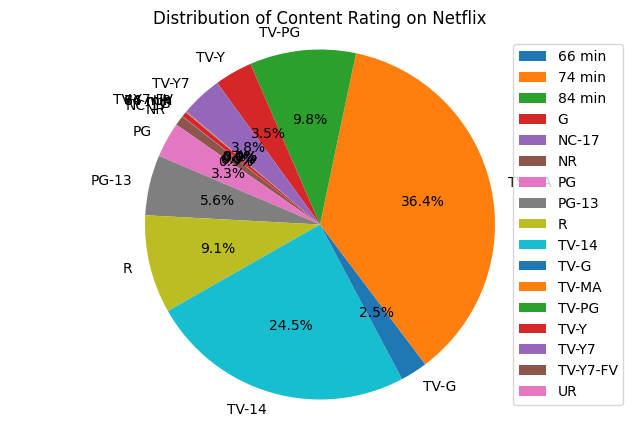

In [78]:
import matplotlib.pyplot as plt

x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)
plt.figure(figsize=(8, 5)) # Increased figure size for better readability
plt.pie(x['counts'], labels=x['rating'], autopct='%1.1f%%', startangle=140) # Added labels and autopct
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Content Rating on Netflix')
plt.legend(labels=x['rating'], loc='right') # Kept the legend
plt.show()

**Filling the null values of data**

In [ ]:
df['director']= df['director'].fillna('No Director Specified')
df['cast']= df['cast'].fillna('No Cast Specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director Specified,No Cast Specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
directors_list = pd.DataFrame()
directors_list['director'] = df['director'].str.split(',').explode()
directors_list

,director
0,Kirsten Johnson
1,No Director Specified
2,Julien Leclercq
3,No Director Specified
4,No Director Specified
...,...
8802,David Fincher
8803,No Director Specified
8804,Ruben Fleischer
8805,Peter Hewitt


In [ ]:
directors_list.columns = ['Directors']
print(directors_list)

                  Directors
0           Kirsten Johnson
1     No Director Specified
2           Julien Leclercq
3     No Director Specified
4     No Director Specified
...                     ...
8802          David Fincher
8803  No Director Specified
8804        Ruben Fleischer
8805           Peter Hewitt
8806            Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors = directors_list.groupby(['Directors']).size().reset_index(name='counts')
directors = directors.sort_values(by=['counts'], ascending=False)
directors.head()

,Directors,counts
3684,No Director Specified,2634
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16


**Finding top 5 directors**

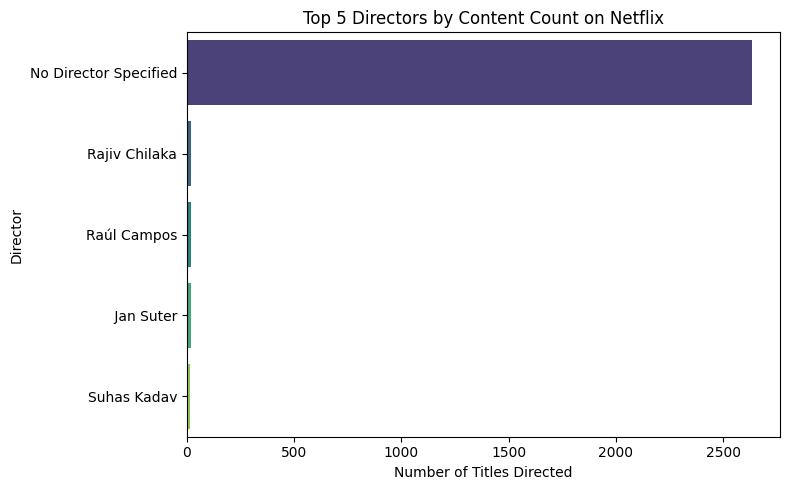

In [73]:
# Sort the directors by count and select the top 5
top_directors = directors.head(5)

# Create a horizontal bar chart using matplotlib and seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='counts', y='Directors', data=top_directors, palette='viridis')
plt.title('Top 5 Directors by Content Count on Netflix')
plt.xlabel('Number of Titles Directed')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

**Finding the top 5 Actors of content on Netflix**

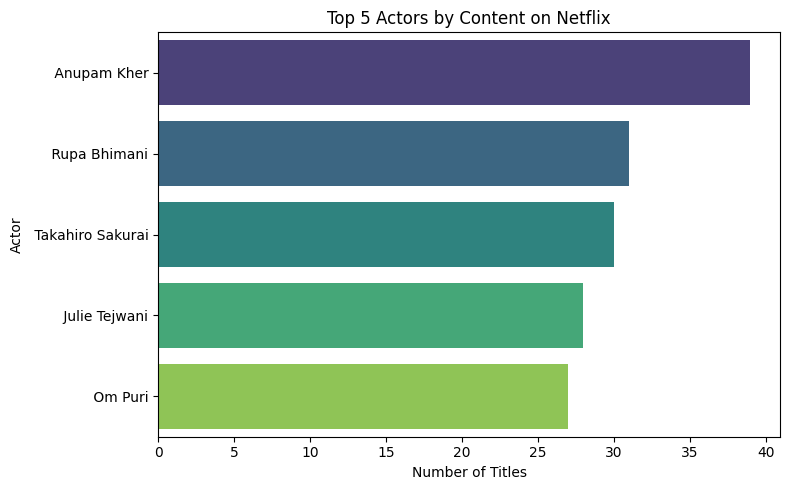

In [72]:
df['cast']=df['cast'].fillna('No Cast Specified')
cast_df = pd.DataFrame()
cast_df['Actor'] = df['cast'].str.split(',',expand=True).stack().reset_index(drop=True)
actors = cast_df.groupby('Actor').size().reset_index(name= 'Total Counts')
actors= actors[actors.Actor != 'No Cast Specified']
actors = actors.sort_values(by=['Total Counts'], ascending=False)
top5Actors = actors.head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x='Total Counts', y='Actor', data=top5Actors, palette='viridis')
plt.title('Top 5 Actors by Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

# Task
Analyze the "netflix_titles.csv" dataset to find the most popular genres and visualize the results.

## Extract genres

### Subtask:
Create a DataFrame containing individual genres from the 'listed_in' column.


**Reasoning**:
Create a new DataFrame `genres_df` by splitting the 'listed_in' column and renaming the resulting column to 'Genre', as per the instructions.



In [ ]:
genres_df = pd.DataFrame()
genres_df['Genre'] = df['listed_in'].str.split(',', expand=True).stack().reset_index(drop=True)

## Count genre occurrences

### Subtask:
Count the number of times each genre appears in the dataset.


**Reasoning**:
Count the occurrences of each genre and sort the results.



In [ ]:
genres = genres_df.groupby(['Genre']).size().reset_index(name='Genre Counts')
genres = genres.sort_values(by=['Genre Counts'], ascending=False)

## Find most popular genres

### Subtask:
Identify the genres with the highest counts.


**Reasoning**:
Select the top 10 genres from the sorted `genres` DataFrame and store the result in a new DataFrame called `top_genres`.



In [ ]:
top_genres = genres.head(10)

## Visualize popular genres

### Subtask:
Create a visualization (e.g., a bar chart) to show the counts of the most popular genres.


**Reasoning**:
Create a bar chart to visualize the top 10 most popular genres.



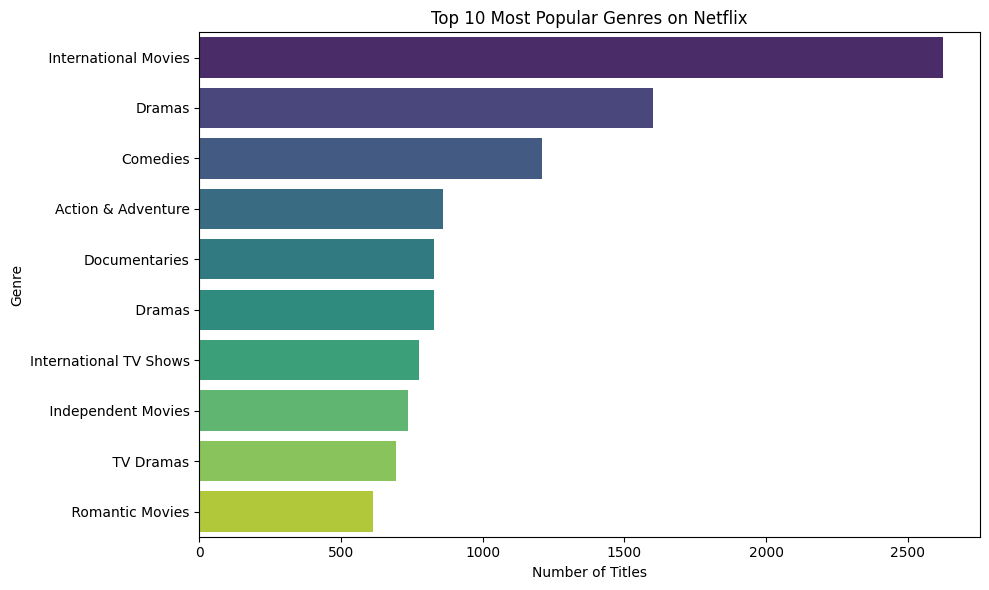

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre Counts', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**Reasoning**:
The variable `top_genres` is not defined. I need to recreate it before creating the plot.



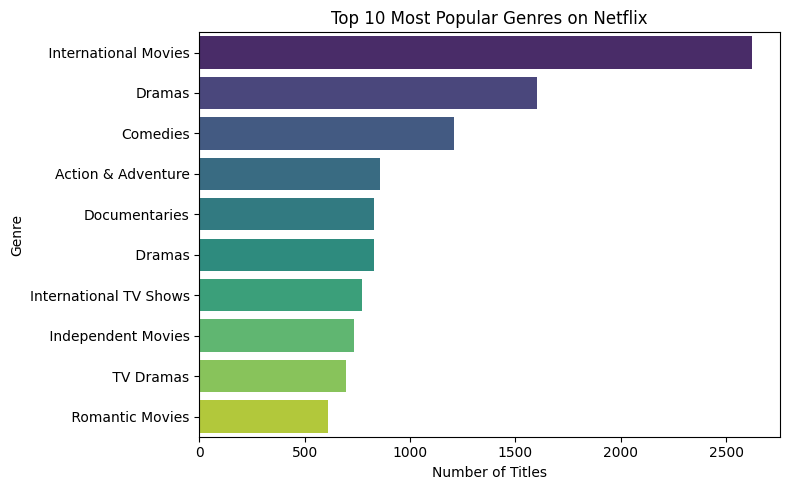

In [71]:
genres_df = pd.DataFrame()
genres_df['Genre'] = df['listed_in'].str.split(',', expand=True).stack().reset_index(drop=True)
genres = genres_df.groupby(['Genre']).size().reset_index(name='Genre Counts')
genres = genres.sort_values(by=['Genre Counts'], ascending=False)
top_genres = genres.head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x='Genre Counts', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()